In [1]:
## research question
## Given a claim and a topic, can we figure out if the claim is for or against the topic?

import numpy as np
import pandas as pd
import string
import nltk
from sklearn.linear_model import LogisticRegression
from utils import MyTokenizer, MySentences, MeanEmbeddingVectorizer, evaluate_train

In [2]:
claimDF = pd.read_csv("IBM_EACL-2017.v1/claim_stance_dataset_v1.csv")

In [3]:
# 2394
# create dataset
test = claimDF[['claims.stance', 'claims.claimCorrectedText', 'topicText']]

In [4]:
print test['claims.claimCorrectedText'][0]
#print test['topicTarget'][0]
#print test['claims.stance'][0]

Exposure to violent video games causes at least a temporary increase in aggression and this exposure correlates with aggression in the real world


In [5]:
mean_embedding_vectorizer = MeanEmbeddingVectorizer(None)

test['claim_token'] = test['claims.claimCorrectedText'].apply(lambda x: nltk.word_tokenize(x.lower()))
test['claim_mean']  = test['claim_token'].apply(lambda x: mean_embedding_vectorizer.transform(x))

test['topic_token'] = test['topicText'].apply(lambda x: nltk.word_tokenize(x.lower()))
test['topic_mean']  = test['topic_token'].apply(lambda x: mean_embedding_vectorizer.transform(x))

test['final_embedding'] = test.apply(lambda x: [np.append(x['claim_mean'], x['topic_mean'])], axis=1)
test['stance'] = test['claims.stance'].apply(lambda x: 0 if x == 'PRO' else 1)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

X = np.vstack(test['final_embedding'].as_matrix())
y = test['stance'].values.ravel()

probas = cross_val_predict(
        LogisticRegression(), 
        X, 
        y, 
        cv=StratifiedKFold(random_state=8), 
        method='predict_proba',
        verbose=2)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished


In [7]:
for i in range(2394):
    print i, y[i], probas[i]

0 0 [0.71192847 0.28807153]
1 1 [0.58121823 0.41878177]
2 1 [0.4114759 0.5885241]
3 0 [0.66842866 0.33157134]
4 0 [0.52608905 0.47391095]
5 1 [0.4612828 0.5387172]
6 0 [0.74430825 0.25569175]
7 0 [0.68648648 0.31351352]
8 0 [0.57407121 0.42592879]
9 0 [0.62443467 0.37556533]
10 1 [0.45795919 0.54204081]
11 1 [0.48957514 0.51042486]
12 1 [0.62657852 0.37342148]
13 1 [0.74828012 0.25171988]
14 1 [0.30732103 0.69267897]
15 1 [0.6678654 0.3321346]
16 0 [0.34609194 0.65390806]
17 0 [0.65355288 0.34644712]
18 0 [0.26337152 0.73662848]
19 1 [0.52624283 0.47375717]
20 0 [0.46665244 0.53334756]
21 0 [0.60075771 0.39924229]
22 0 [0.50745216 0.49254784]
23 1 [0.51771929 0.48228071]
24 1 [0.36176519 0.63823481]
25 1 [0.37081044 0.62918956]
26 1 [0.15952632 0.84047368]
27 1 [0.64337245 0.35662755]
28 1 [0.56975663 0.43024337]
29 1 [0.53526037 0.46473963]
30 1 [0.34892849 0.65107151]
31 0 [0.59608924 0.40391076]
32 0 [0.66054535 0.33945465]
33 0 [0.81068791 0.18931209]
34 0 [0.74484914 0.25515086]
3

421 1 [0.51599202 0.48400798]
422 0 [0.81440006 0.18559994]
423 0 [0.57016359 0.42983641]
424 0 [0.79414188 0.20585812]
425 0 [0.63483151 0.36516849]
426 0 [0.90270858 0.09729142]
427 0 [0.76284672 0.23715328]
428 0 [0.74354997 0.25645003]
429 0 [0.91361312 0.08638688]
430 0 [0.66033674 0.33966326]
431 0 [0.84483869 0.15516131]
432 0 [0.50213513 0.49786487]
433 1 [0.68226457 0.31773543]
434 1 [0.74163039 0.25836961]
435 1 [0.71966351 0.28033649]
436 1 [0.62123066 0.37876934]
437 1 [0.78209889 0.21790111]
438 1 [0.64072765 0.35927235]
439 0 [0.51380272 0.48619728]
440 0 [0.60394242 0.39605758]
441 1 [0.43296806 0.56703194]
442 0 [0.58653656 0.41346344]
443 0 [0.64880413 0.35119587]
444 0 [0.51939847 0.48060153]
445 0 [0.88698378 0.11301622]
446 0 [0.84054135 0.15945865]
447 0 [0.73637896 0.26362104]
448 0 [0.57864234 0.42135766]
449 0 [0.65153782 0.34846218]
450 1 [0.40371305 0.59628695]
451 0 [0.4511066 0.5488934]
452 0 [0.61538415 0.38461585]
453 0 [0.309122 0.690878]
454 1 [0.3915687

814 0 [0.33163762 0.66836238]
815 0 [0.2060999 0.7939001]
816 0 [0.12811906 0.87188094]
817 0 [0.27110953 0.72889047]
818 0 [0.11670025 0.88329975]
819 1 [0.95140451 0.04859549]
820 1 [0.9043254 0.0956746]
821 1 [0.90402125 0.09597875]
822 0 [0.20839809 0.79160191]
823 1 [0.82826151 0.17173849]
824 1 [0.76889652 0.23110348]
825 1 [0.9144039 0.0855961]
826 1 [0.9163798 0.0836202]
827 1 [0.96418836 0.03581164]
828 1 [0.96592889 0.03407111]
829 1 [0.8473912 0.1526088]
830 0 [0.37222058 0.62777942]
831 0 [0.39034511 0.60965489]
832 0 [0.28089069 0.71910931]
833 0 [0.33083137 0.66916863]
834 0 [0.38322426 0.61677574]
835 0 [0.60943948 0.39056052]
836 1 [0.83724615 0.16275385]
837 1 [0.80996828 0.19003172]
838 1 [0.87315408 0.12684592]
839 0 [0.38840171 0.61159829]
840 0 [0.2128619 0.7871381]
841 0 [0.1432069 0.8567931]
842 1 [0.95029518 0.04970482]
843 1 [0.85722257 0.14277743]
844 0 [0.57178902 0.42821098]
845 1 [0.91650764 0.08349236]
846 1 [0.91972338 0.08027662]
847 1 [0.84471402 0.1552

1140 1 [0.86033538 0.13966462]
1141 1 [0.81592078 0.18407922]
1142 1 [0.85892695 0.14107305]
1143 0 [0.94647927 0.05352073]
1144 0 [0.89567695 0.10432305]
1145 1 [0.92068381 0.07931619]
1146 1 [0.91152789 0.08847211]
1147 1 [0.9029545 0.0970455]
1148 1 [0.85627785 0.14372215]
1149 1 [0.91173293 0.08826707]
1150 1 [0.90827735 0.09172265]
1151 1 [0.88144712 0.11855288]
1152 1 [0.93471444 0.06528556]
1153 1 [0.88718887 0.11281113]
1154 1 [0.92596987 0.07403013]
1155 0 [0.94791938 0.05208062]
1156 1 [0.70220721 0.29779279]
1157 1 [0.89965567 0.10034433]
1158 0 [0.86048416 0.13951584]
1159 0 [0.90224839 0.09775161]
1160 1 [0.86071256 0.13928744]
1161 0 [0.88491385 0.11508615]
1162 0 [0.90306821 0.09693179]
1163 0 [0.59101933 0.40898067]
1164 0 [0.71775032 0.28224968]
1165 0 [0.91555445 0.08444555]
1166 0 [0.98435799 0.01564201]
1167 0 [0.88746128 0.11253872]
1168 0 [0.90162744 0.09837256]
1169 0 [0.94970369 0.05029631]
1170 1 [0.89826976 0.10173024]
1171 0 [0.83616505 0.16383495]
1172 0 [0.

1577 1 [0.7673783 0.2326217]
1578 1 [0.64678399 0.35321601]
1579 1 [0.80696079 0.19303921]
1580 1 [0.69975196 0.30024804]
1581 1 [0.65678603 0.34321397]
1582 1 [0.40665294 0.59334706]
1583 0 [0.26321328 0.73678672]
1584 0 [0.2430526 0.7569474]
1585 0 [0.22648315 0.77351685]
1586 1 [0.95499324 0.04500676]
1587 0 [0.14260793 0.85739207]
1588 1 [0.79465735 0.20534265]
1589 0 [0.24462362 0.75537638]
1590 1 [0.94336916 0.05663084]
1591 0 [0.02830711 0.97169289]
1592 0 [0.04506311 0.95493689]
1593 0 [0.03220631 0.96779369]
1594 0 [0.06024353 0.93975647]
1595 1 [0.95457954 0.04542046]
1596 1 [0.9395535 0.0604465]
1597 1 [0.96534489 0.03465511]
1598 1 [0.93510845 0.06489155]
1599 1 [0.93816355 0.06183645]
1600 0 [0.06777365 0.93222635]
1601 1 [0.85332779 0.14667221]
1602 0 [0.02423486 0.97576514]
1603 0 [0.01315523 0.98684477]
1604 0 [0.05546951 0.94453049]
1605 0 [0.17332731 0.82667269]
1606 0 [0.04119807 0.95880193]
1607 0 [0.05454578 0.94545422]
1608 0 [0.03997805 0.96002195]
1609 0 [0.0736

1996 0 [0.93523365 0.06476635]
1997 1 [0.67549077 0.32450923]
1998 0 [0.94394657 0.05605343]
1999 0 [0.92380333 0.07619667]
2000 0 [0.83360699 0.16639301]
2001 0 [0.95725777 0.04274223]
2002 0 [0.95937746 0.04062254]
2003 0 [0.35857659 0.64142341]
2004 0 [0.92563154 0.07436846]
2005 0 [0.97789852 0.02210148]
2006 1 [0.94372515 0.05627485]
2007 1 [0.95399914 0.04600086]
2008 0 [0.88359097 0.11640903]
2009 0 [0.94582942 0.05417058]
2010 1 [0.67850923 0.32149077]
2011 1 [0.88616093 0.11383907]
2012 0 [0.89901619 0.10098381]
2013 0 [0.90087754 0.09912246]
2014 0 [0.85425084 0.14574916]
2015 0 [0.92177254 0.07822746]
2016 1 [0.87045299 0.12954701]
2017 0 [0.86801571 0.13198429]
2018 0 [0.96636093 0.03363907]
2019 0 [0.83018828 0.16981172]
2020 0 [0.93132209 0.06867791]
2021 0 [0.96199112 0.03800888]
2022 0 [0.64251905 0.35748095]
2023 0 [0.80245179 0.19754821]
2024 0 [0.8600199 0.1399801]
2025 1 [0.86784809 0.13215191]
2026 1 [0.3823393 0.6176607]
2027 0 [0.85923576 0.14076424]
2028 0 [0.85

2349 1 [0.50957831 0.49042169]
2350 1 [0.54387638 0.45612362]
2351 0 [0.93231037 0.06768963]
2352 1 [0.62933807 0.37066193]
2353 1 [0.22510757 0.77489243]
2354 1 [0.69422433 0.30577567]
2355 1 [0.81479414 0.18520586]
2356 1 [0.41171081 0.58828919]
2357 1 [0.80107208 0.19892792]
2358 1 [0.72417809 0.27582191]
2359 1 [0.45706986 0.54293014]
2360 1 [0.70743022 0.29256978]
2361 1 [0.59596219 0.40403781]
2362 0 [0.80743843 0.19256157]
2363 0 [0.77431355 0.22568645]
2364 0 [0.55590339 0.44409661]
2365 1 [0.85404298 0.14595702]
2366 0 [0.78532854 0.21467146]
2367 0 [0.77664256 0.22335744]
2368 0 [0.86127461 0.13872539]
2369 1 [0.44375984 0.55624016]
2370 0 [0.29133948 0.70866052]
2371 1 [0.67617971 0.32382029]
2372 1 [0.90632376 0.09367624]
2373 0 [0.89449844 0.10550156]
2374 0 [0.72406889 0.27593111]
2375 0 [0.87299294 0.12700706]
2376 1 [0.4568044 0.5431956]
2377 0 [0.34060142 0.65939858]
2378 0 [0.41111716 0.58888284]
2379 0 [0.90203741 0.09796259]
2380 0 [0.80764269 0.19235731]
2381 0 [0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[[0.71192847 0.28807153]
 [0.58121823 0.41878177]
 [0.4114759  0.5885241 ]
 ...
 [0.4734937  0.5265063 ]
 [0.60906098 0.39093902]
 [0.42951717 0.57048283]]
Train Log loss: 1.15174694403
Train Accuracy: 0.476608187135


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s finished
/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

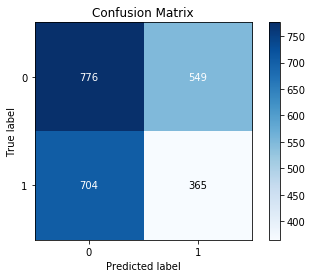

In [8]:
evaluate_train(X, y, LogisticRegression())

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.4s finished
/usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


[[0.58233202 0.41766798]
 [0.58482537 0.41517463]
 [0.53747389 0.46252611]
 ...
 [0.51246793 0.48753207]
 [0.58034266 0.41965734]
 [0.54232116 0.45767884]]
Train Log loss: 0.809983515479
Train Accuracy: 0.475772765246


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

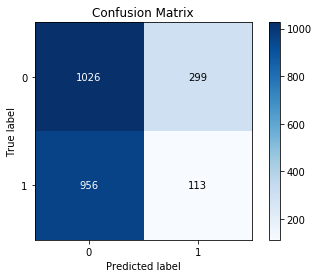

In [14]:
from sklearn.ensemble import RandomForestClassifier
evaluate_train(X, y, RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))
